<a href="https://colab.research.google.com/github/zahraDehghanian97/Canny_edge_detector/blob/master/Canny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
import os

In [2]:
def canny_edge_detection(image, sigma=1, kernel_size=5, low_threshold=50, high_threshold=150):
    """Canny edge detection algorithm implementation from scratch"""

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian filter to smooth the image
    blur = cv2.GaussianBlur(gray, (kernel_size, kernel_size), sigma)

    # Calculate the gradient magnitude and direction using Sobel operators
    dx = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=3)
    dy = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=3)
    mag = np.sqrt(dx*dx + dy*dy)
    angle = np.arctan2(dy, dx) * 180 / np.pi

    # Quantize the gradient direction into 4 possible angles: 0, 45, 90, and 135 degrees
    angle[angle < 0] += 180
    angle[angle >= 157.5] = 0
    angle[(angle >= 22.5) & (angle < 67.5)] = 45
    angle[(angle >= 67.5) & (angle < 112.5)] = 90
    angle[(angle >= 112.5) & (angle < 157.5)] = 135

    # Apply non-maximum suppression to thin the edges
    suppressed = np.zeros_like(mag)
    for i in range(1, mag.shape[0]-1):
        for j in range(1, mag.shape[1]-1):
            direction = angle[i, j]
            if direction == 0:
                if mag[i, j] > mag[i, j-1] and mag[i, j] > mag[i, j+1]:
                    suppressed[i, j] = mag[i, j]
            elif direction == 45:
                if mag[i, j] > mag[i-1, j+1] and mag[i, j] > mag[i+1, j-1]:
                    suppressed[i, j] = mag[i, j]
            elif direction == 90:
                if mag[i, j] > mag[i-1, j] and mag[i, j] > mag[i+1, j]:
                    suppressed[i, j] = mag[i, j]
            elif direction == 135:
                if mag[i, j] > mag[i-1, j-1] and mag[i, j] > mag[i+1, j+1]:
                    suppressed[i, j] = mag[i, j]

    # Apply hysteresis thresholding to determine the final edges
    strong_edges = suppressed > high_threshold
    weak_edges = (suppressed >= low_threshold) & (suppressed <= high_threshold)
    edges = np.zeros_like(suppressed)
    edges[strong_edges] = 255
    for i in range(1, edges.shape[0]-1):
        for j in range(1, edges.shape[1]-1):
            if weak_edges[i, j]:
                if (edges[i-1:i+2, j-1:j+2] > high_threshold).any():
                    edges[i, j] = 255

    return edges


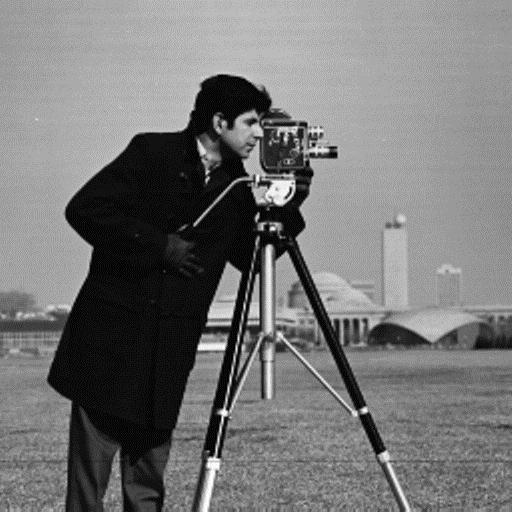

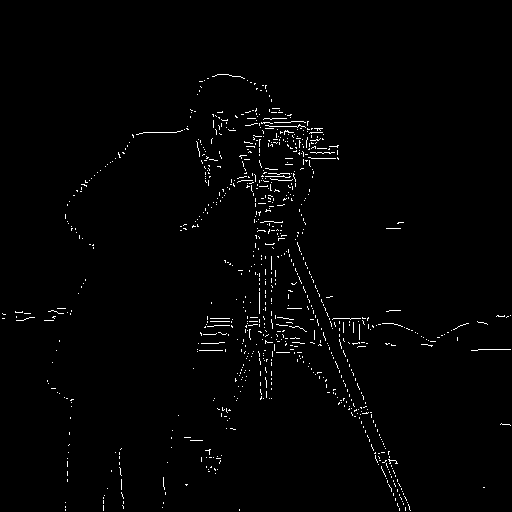

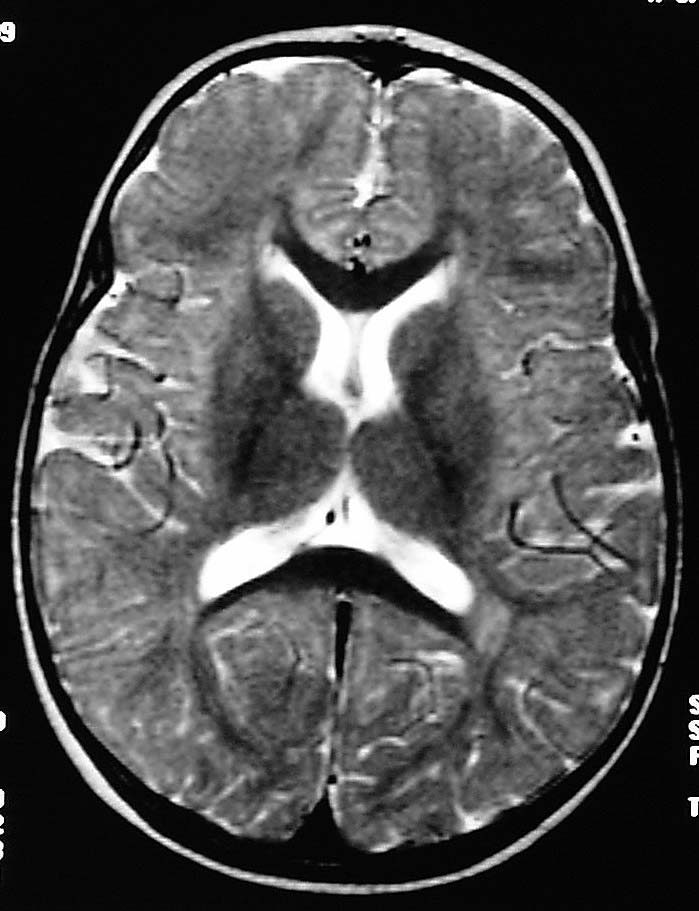

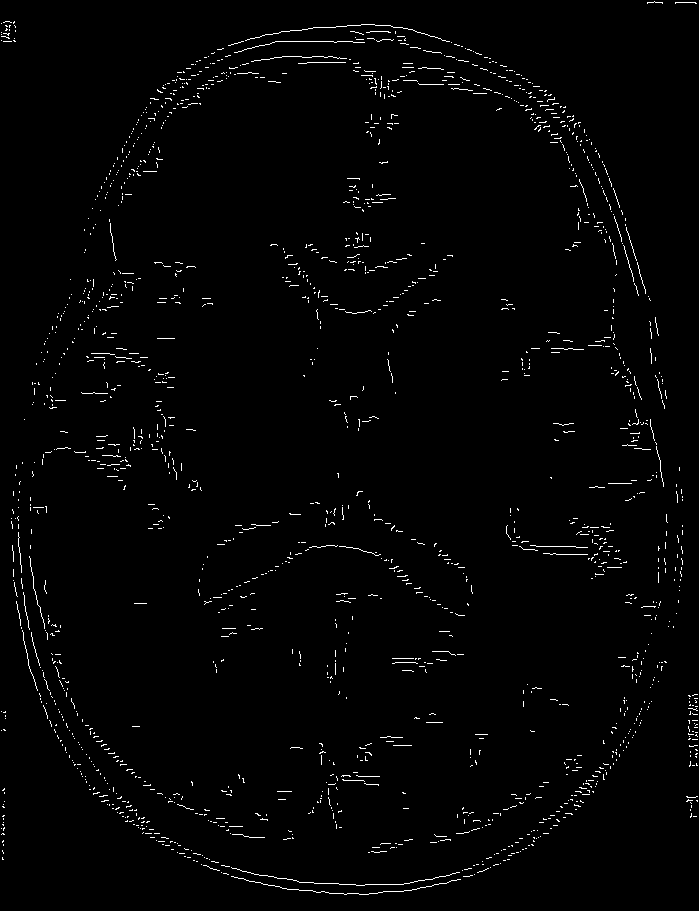

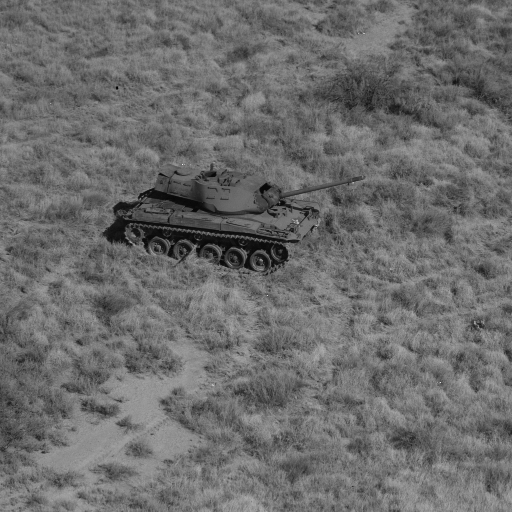

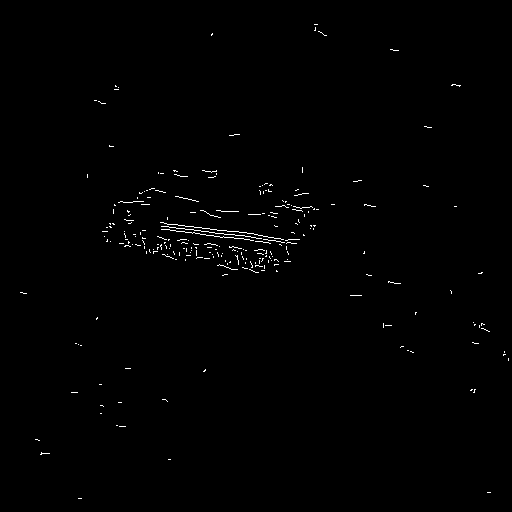

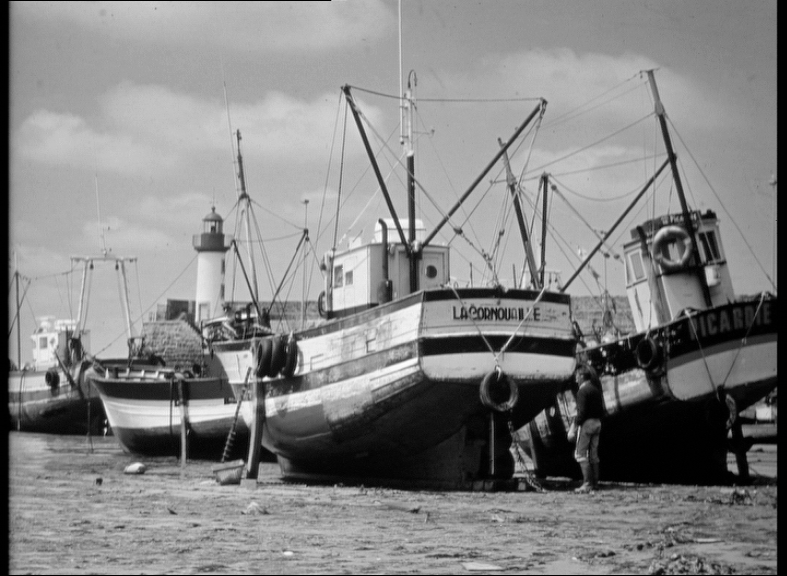

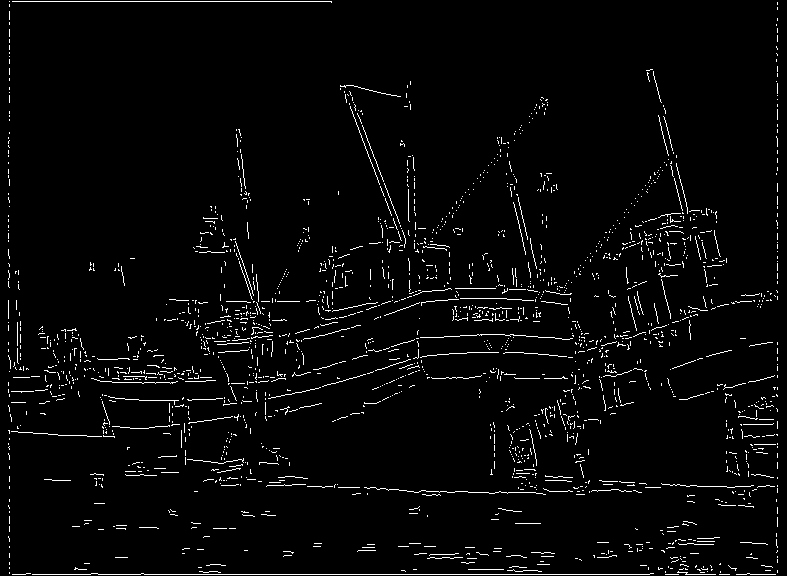

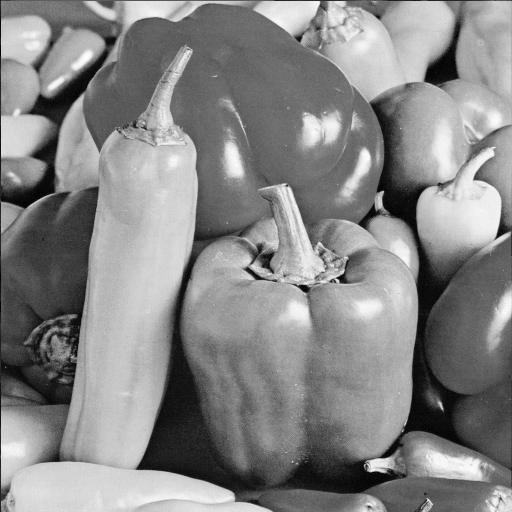

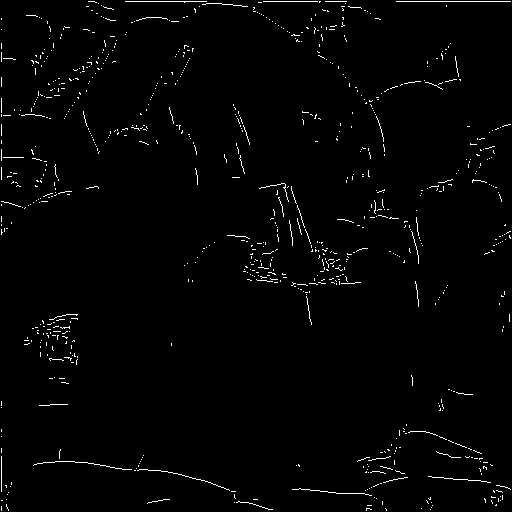

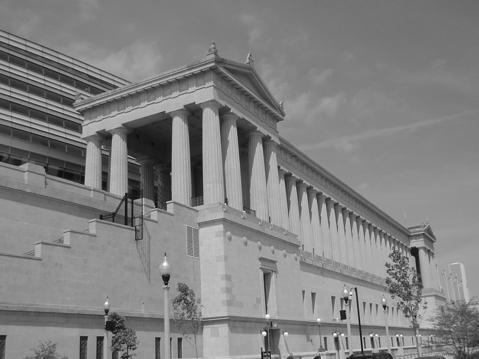

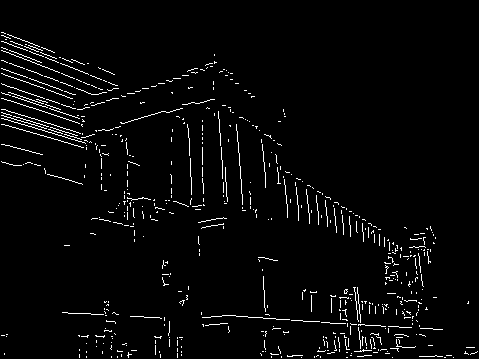

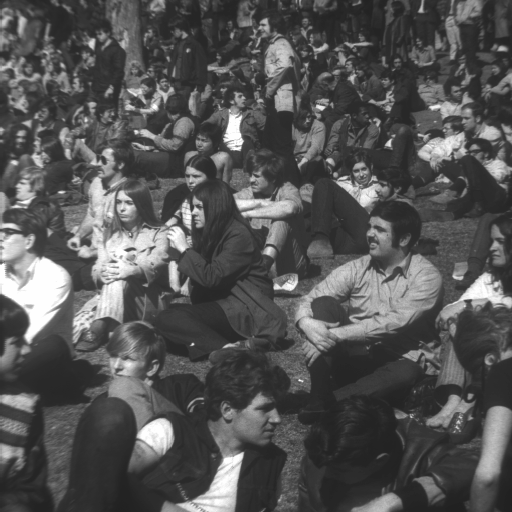

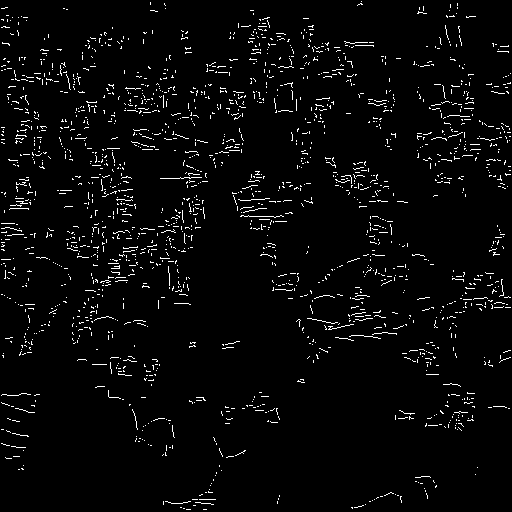

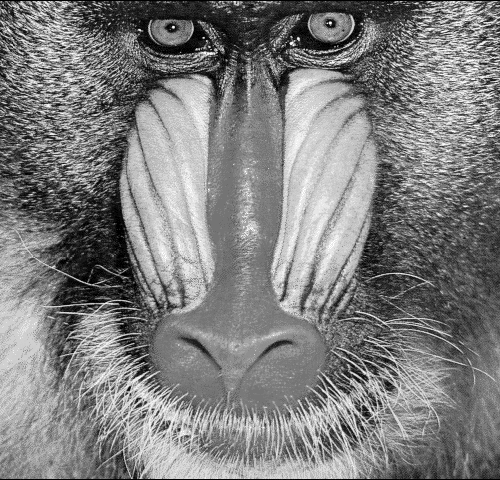

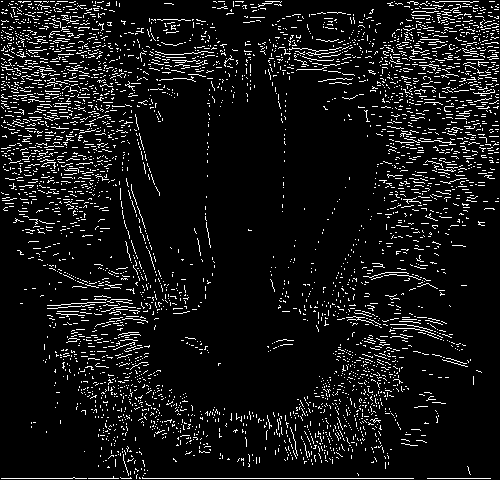

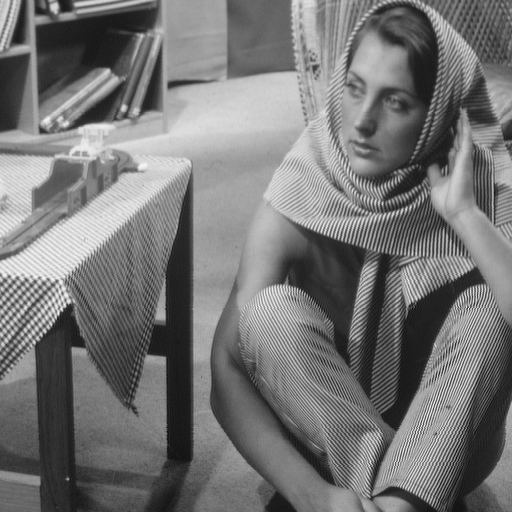

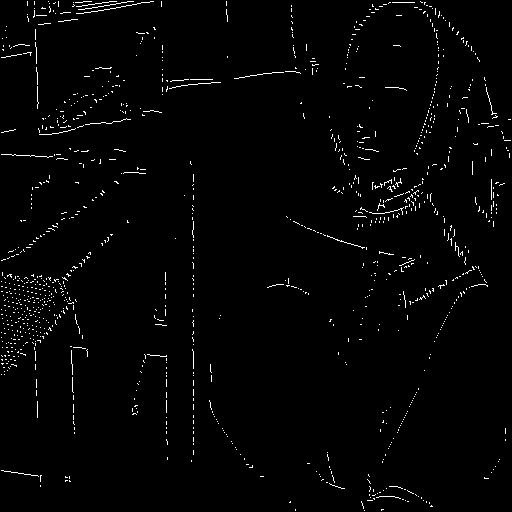

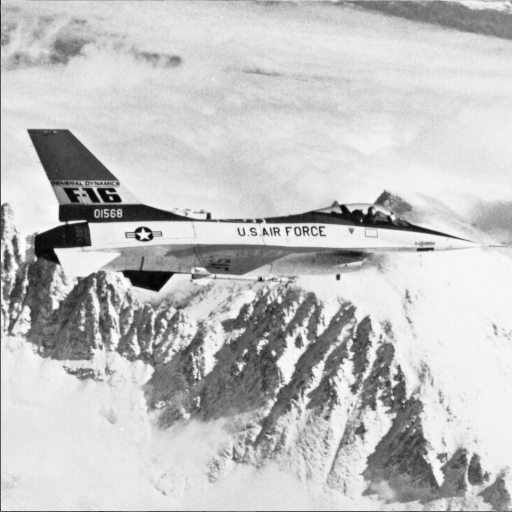

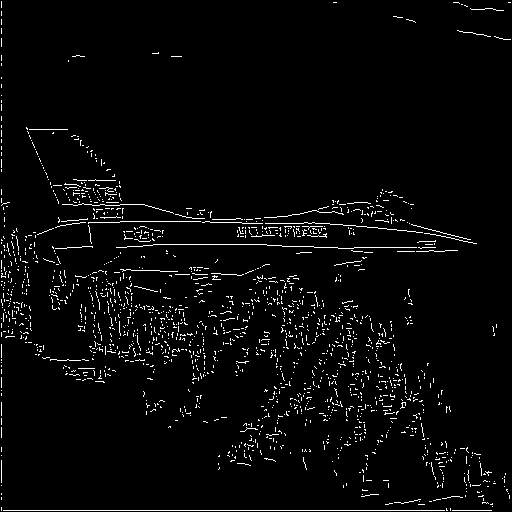

In [8]:
# Test the implementation on every image in the images folder
from google.colab.patches import cv2_imshow
folder = '/content/images'
for filename in os.listdir(folder):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.pgm'):
        filepath = os.path.join(folder, filename)
        image = cv2.imread(filepath)
        edges = canny_edge_detection(image)
        cv2_imshow(image)
        cv2_imshow( edges)
        cv2.waitKey(0)
        cv2.destroyAllWindows()